### Champion Age Trends:
Identify the age ranges where drivers consistently win championships across different decades.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [5]:
data=pd.read_csv('../../../data/processed/fully_integrated_data.csv')
data.columns

Index(['raceId', 'season', 'raceNumber', 'circuitId', 'prixName', 'raceDate',
       'driverId', 'constructorId', 'driverStartGridPos', 'driverFinalGridPos',
       'driverFinalRank', 'driverRacePoints', 'driverLapCount',
       'driverFatestLapNumber', 'driverFastestLapTime',
       'driverFastestLapSpeed', 'constructorName', 'constructorNationality',
       'constructorChampionshipStandingPoints',
       'constructorChampionshipStandingPosition',
       'constructorChampionshipStandingWins', 'constructorRacePoints',
       'driverDateOfBirth', 'driverNationality',
       'driverChampionshipStandingPoints',
       'driverChampionshipStandingPosition', 'driverChampionshipStandingWins',
       'circuitName', 'circuitLocation', 'circuitCountry', 'lat', 'lng', 'alt',
       'driverRaceResultStatus', 'driverName', 'driverAge', 'race_time'],
      dtype='object')


Champion Ages:
   season  driverChampion  birth_year  champion_age
0    1950     Nino Farina        1906            44
1    1951     Juan Fangio        1911            40
2    1952  Alberto Ascari        1918            34
3    1953  Alberto Ascari        1918            35
4    1954     Juan Fangio        1911            43

Age Statistics:
Youngest Champion:
 season                         2008
driverChampion       Lewis Hamilton
birth_year                     1985
champion_age                     23
driverNationality           British
Name: 60, dtype: object
Oldest Champion:
 season                      1957
driverChampion       Juan Fangio
birth_year                  1911
champion_age                  46
driverNationality      Argentine
Name: 7, dtype: object
Average Champion Age: 31.6 years


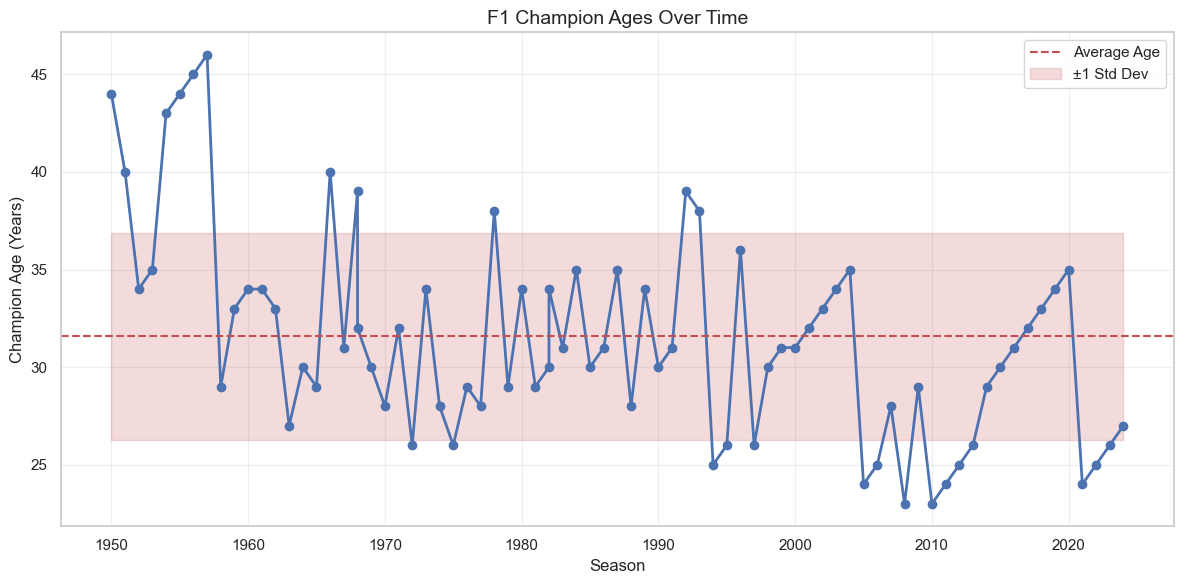

In [9]:
def calculate_champion_age(data):
    """
    Calculate ages of F1 champions at the time of their championship wins
    """
    try:
        # Get the last race of each season to determine champions
        last_races = data.groupby(['season', 'driverName']).agg({
            'driverChampionshipStandingPosition': 'last',
            'driverDateOfBirth': 'first',
            'driverNationality': 'first'
        }).reset_index()
        
        # Filter for champions (position 1)
        champions = last_races[last_races['driverChampionshipStandingPosition'] == 1].copy()
        
        # Extract year from driverDateOfBirth
        champions['birth_year'] = pd.to_datetime(champions['driverDateOfBirth']).dt.year
        
        # Calculate champion's age
        champions['champion_age'] = champions['season'] - champions['birth_year']
        
        # Create final dataframe with required columns
        merged = champions[[
            'season',
            'driverName',
            'birth_year',
            'champion_age',
            'driverNationality'
        ]].rename(columns={'driverName': 'driverChampion'})
        
        # Sort by season
        merged = merged.sort_values('season').reset_index(drop=True)
        
        return merged
    except Exception as e:
        print(f"Error in calculate_champion_age: {e}")
        return None

# Calculate champion ages
champions_age_df = calculate_champion_age(data)

if champions_age_df is not None:
    # Display results with additional statistics
    print("\nChampion Ages:")
    print(champions_age_df[['season', 'driverChampion', 'birth_year', 'champion_age']].head())

    # Additional statistics
    print("\nAge Statistics:")
    print(f"Youngest Champion:\n {champions_age_df.loc[champions_age_df['champion_age'].idxmin()]}")
    print(f"Oldest Champion:\n {champions_age_df.loc[champions_age_df['champion_age'].idxmax()]}")
    print(f"Average Champion Age: {champions_age_df['champion_age'].mean():.1f} years")

    # Create visualization
    plt.figure(figsize=(12, 6))
    plt.plot(champions_age_df['season'], champions_age_df['champion_age'], 
             marker='o', linestyle='-', linewidth=2)
    plt.axhline(y=champions_age_df['champion_age'].mean(), 
                color='r', linestyle='--', label='Average Age')
    plt.fill_between(champions_age_df['season'], 
                     champions_age_df['champion_age'].mean() - champions_age_df['champion_age'].std(),
                     champions_age_df['champion_age'].mean() + champions_age_df['champion_age'].std(),
                     alpha=0.2, color='r', label='±1 Std Dev')

    plt.title('F1 Champion Ages Over Time', fontsize=14)
    plt.xlabel('Season')
    plt.ylabel('Champion Age (Years)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


Champion Age Statistics by Decade:
   decade  mean  median  min  max
0    1950 39.30   41.50   29   46
1    1960 32.64   32.00   27   40
2    1970 29.80   28.50   26   38
3    1980 31.91   31.00   28   35
4    1990 31.20   30.50   25   39
5    2000 29.40   30.00   23   35
6    2010 28.70   29.50   23   34
7    2020 27.40   26.00   24   35


C:\Users\yeshw\AppData\Local\Temp\ipykernel_14080\3761652191.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='decade', y='champion_age', data=champions_age_df, palette='viridis')


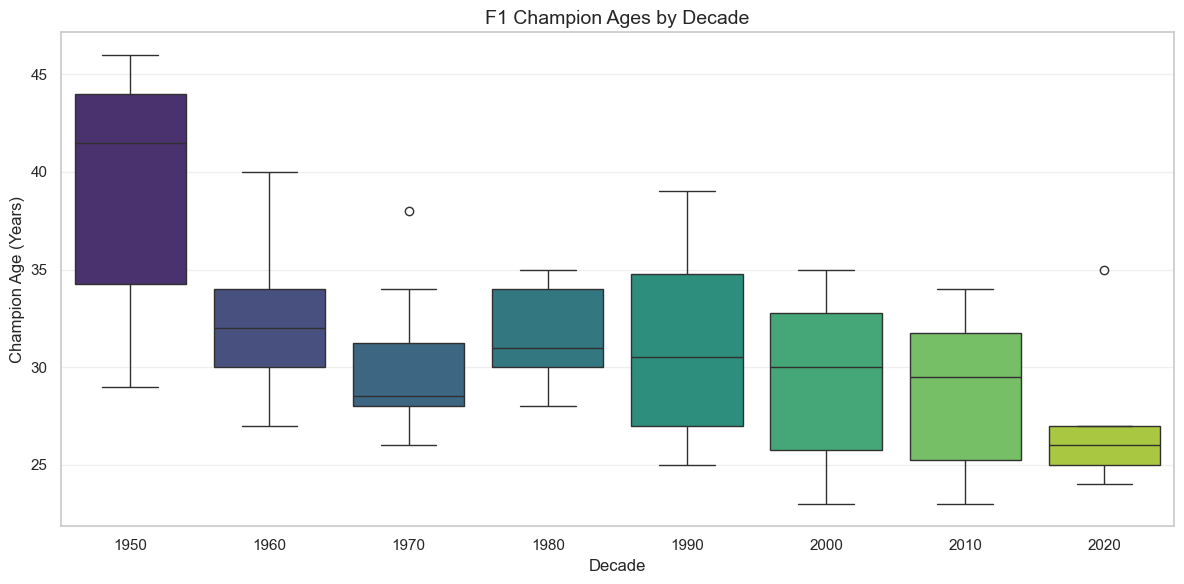

In [11]:
def add_decade_column(df):
    """Add a column for decade (e.g., 1950s, 1960s, etc.) based on the season."""
    df['decade'] = (df['season'] // 10) * 10
    return df

champions_age_df = add_decade_column(champions_age_df)

# Compute summary statistics for champion ages by decade
age_stats = champions_age_df.groupby('decade')['champion_age'].agg(['mean', 'median', 'min', 'max']).reset_index()
print("\nChampion Age Statistics by Decade:")
print(age_stats)


plt.figure(figsize=(12, 6))
sns.boxplot(x='decade', y='champion_age', data=champions_age_df, palette='viridis')
plt.title('F1 Champion Ages by Decade', fontsize=14)
plt.xlabel('Decade')
plt.ylabel('Champion Age (Years)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


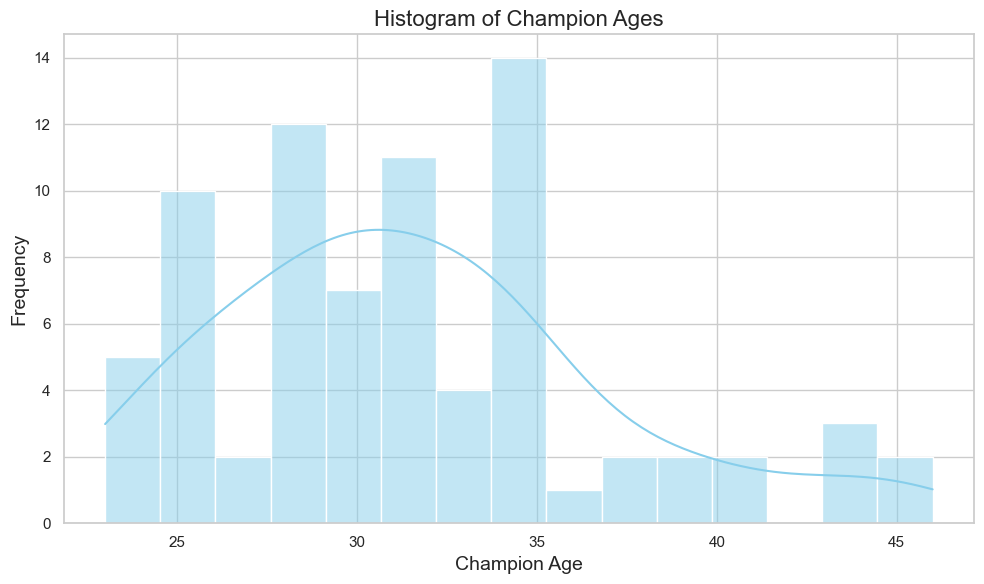

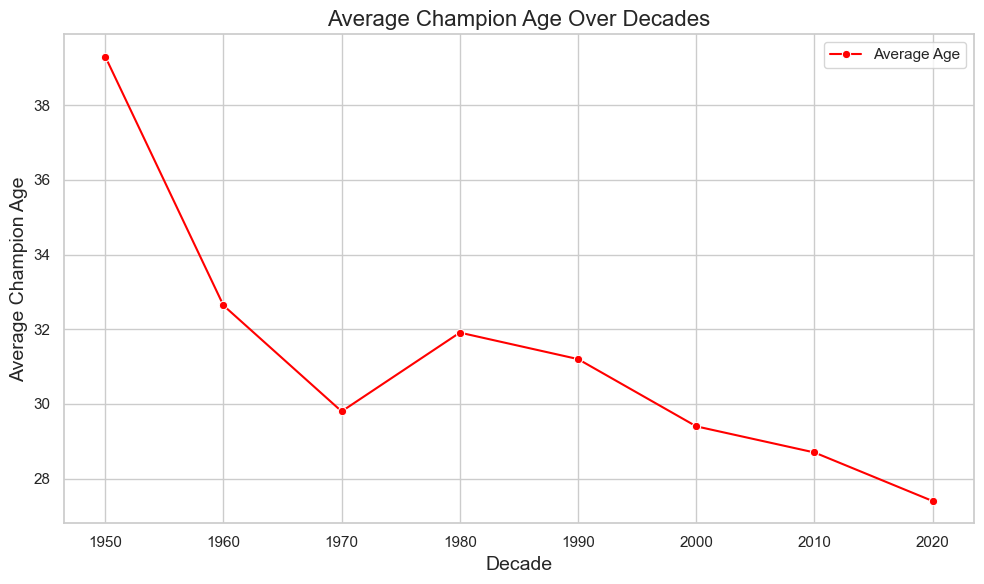

In [12]:
# Histogram of champion ages overall
plt.figure(figsize=(10, 6))
sns.histplot(champions_age_df['champion_age'], bins=15, kde=True, color='skyblue')
plt.title('Histogram of Champion Ages', fontsize=16)
plt.xlabel('Champion Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

# Line plot of average champion age by decade
plt.figure(figsize=(10, 6))
sns.lineplot(x='decade', y='mean', data=age_stats, marker='o', color='red', label='Average Age')
plt.title('Average Champion Age Over Decades', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Average Champion Age', fontsize=14)
plt.xticks(age_stats['decade'])
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
def analyze_champion_age_statistics(champions_df):
    """
    Perform detailed statistical analysis on champion ages
    """
    stats = {
        'mean_age': champions_df['champion_age'].mean(),
        'median_age': champions_df['champion_age'].median(),
        'std_age': champions_df['champion_age'].std(),
        'youngest_champion': champions_df.loc[champions_df['champion_age'].idxmin()],
        'oldest_champion': champions_df.loc[champions_df['champion_age'].idxmax()],
        'age_range': champions_df['champion_age'].max() - champions_df['champion_age'].min()
    }
    return stats

In [21]:
def create_champion_age_visualizations(champions_df):
    """
    Create multiple visualizations for champion age analysis
    """

    
    # Create figure with subplots
    fig = plt.figure(figsize=(15, 10))
    gs = fig.add_gridspec(2, 2, hspace=0.3)
    
    # Age Trend Plot
    ax1 = fig.add_subplot(gs[0, :])
    sns.regplot(data=champions_df, x='season', y='champion_age',
                scatter_kws={'s': 50}, line_kws={'color': 'red'})
    ax1.set_title('Champion Age Trends with Regression Line')
    
    # Age Distribution
    ax2 = fig.add_subplot(gs[1, 0])
    sns.histplot(data=champions_df, x='champion_age', bins=15)
    ax2.set_title('Distribution of Champion Ages')
    
    # Age by Nationality
    ax3 = fig.add_subplot(gs[1, 1])
    sns.boxplot(data=champions_df, y='driverNationality', x='champion_age')
    ax3.set_title('Champion Ages by Nationality')
    
    return fig


Champion Age Analysis:
Average Champion Age: 31.6 years
Age Range: 23.0 years

Youngest Champion:
Lewis Hamilton (23 years)

Oldest Champion:
Juan Fangio (46 years)


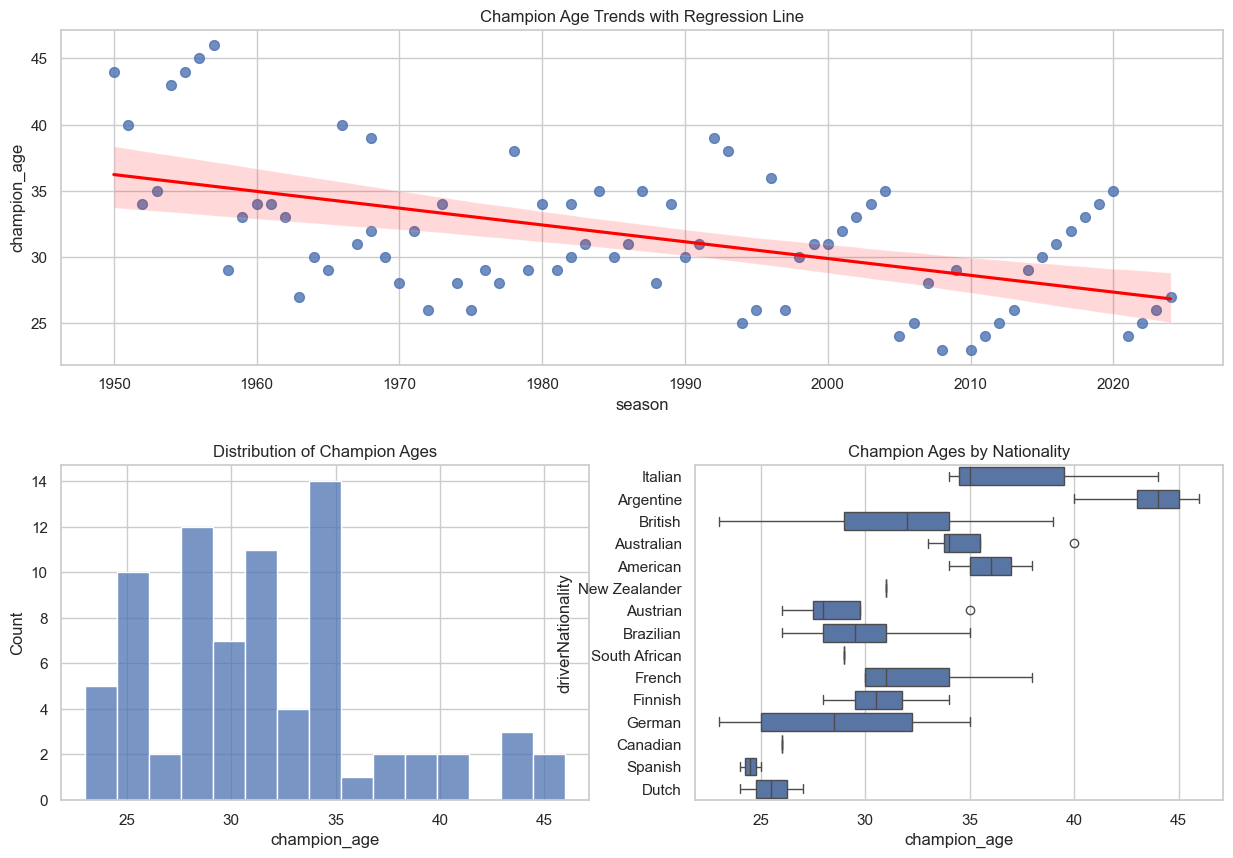

In [22]:
def run_champion_age_analysis(data):
    """
    Run complete champion age analysis
    """
    # Calculate champion ages
    champions_df = calculate_champion_age(data)
    
    # Get statistics
    stats = analyze_champion_age_statistics(champions_df)
    
    
    # Create visualizations
    fig = create_champion_age_visualizations(champions_df)
    
    # Print results
    print("\nChampion Age Analysis:")
    print(f"Average Champion Age: {stats['mean_age']:.1f} years")
    print(f"Age Range: {stats['age_range']:.1f} years")
    print("\nYoungest Champion:")
    print(f"{stats['youngest_champion']['driverChampion']} "
          f"({stats['youngest_champion']['champion_age']} years)")
    print("\nOldest Champion:")
    print(f"{stats['oldest_champion']['driverChampion']} "
          f"({stats['oldest_champion']['champion_age']} years)")
    
    
    # Save results
    champions_df.to_csv('champion_ages.csv', index=False)
    
    return champions_df, stats

# Run analysis
champions_df, stats = run_champion_age_analysis(data)

###  Age Bracket and Optimal Age Range Analysis

In [23]:
def analyze_champion_age_ranges(champions_df):
    """
    Analyze champion age ranges and their success patterns
    """
    # Create age brackets (5-year intervals)
    champions_df['age_bracket'] = pd.cut(
        champions_df['champion_age'],
        bins=range(20, 46, 5),
        labels=['20-25', '25-30', '30-35', '35-40', '40-45']
    )

    # Create decade groups
    champions_df['decade'] = (champions_df['season'] // 10) * 10

    # Calculate success metrics by age bracket and decade
    success_matrix = pd.crosstab(
        champions_df['decade'],
        champions_df['age_bracket'],
        normalize='index'
    ) * 100  # Convert to percentage

    return success_matrix

def visualize_age_range_patterns(champions_df):
    """
    Create visualizations for age range success patterns
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Heat map of success rates
    success_matrix = analyze_champion_age_ranges(champions_df)
    sns.heatmap(
        success_matrix,
        annot=True,
        fmt='.1f',
        cmap='YlOrRd',
        ax=ax1
    )
    ax1.set_title('Championship Success Rate by Age Range (%)')
    ax1.set_ylabel('Decade')

    # Peak Performance Analysis
    peak_ages = champions_df.groupby('decade')['champion_age'].agg(['mean', 'std'])
    peak_ages.plot(
        kind='bar',
        y='mean',
        yerr='std',
        ax=ax2,
        capsize=5
    )
    ax2.set_title('Peak Championship Age by Decade')
    ax2.set_ylabel('Age (years)')

    plt.tight_layout()
    return fig

def identify_optimal_age_ranges(champions_df):
    """
    Identify optimal age ranges for championship success
    """
    # Calculate win rate by age
    age_wins = champions_df.groupby('champion_age').size()
    total_seasons = len(champions_df)
    win_rate = (age_wins / total_seasons) * 100

    # Find age ranges with highest success rates
    optimal_ages = win_rate[win_rate > win_rate.mean()]
    
    # Calculate consecutive successful age ranges
    consecutive_ranges = []
    current_range = []
    
    for age in sorted(optimal_ages.index):
        if not current_range or age == current_range[-1] + 1:
            current_range.append(age)
        else:
            if len(current_range) > 1:
                consecutive_ranges.append(current_range)
            current_range = [age]
    
    if len(current_range) > 1:
        consecutive_ranges.append(current_range)

    return optimal_ages, consecutive_ranges

# Main analysis function
def analyze_championship_age_patterns(data):
    """
    Comprehensive analysis of championship age patterns
    """
    champions_df = calculate_champion_age(data)
    
    # Get optimal age ranges
    optimal_ages, consecutive_ranges = identify_optimal_age_ranges(champions_df)
    
    # Create visualization
    fig = visualize_age_range_patterns(champions_df)
    
    # Print insights
    print("\nChampionship Age Pattern Analysis:")
    print("\nOptimal Age Ranges for Championships:")
    for age_range in consecutive_ranges:
        win_rate = optimal_ages[age_range].mean()
        print(f"Ages {min(age_range)}-{max(age_range)}: {win_rate:.1f}% win rate")
    
    # Save results
    fig.savefig('age_range_patterns.png', dpi=300, bbox_inches='tight')
    
    return champions_df, optimal_ages, consecutive_ranges


Championship Age Pattern Analysis:

Optimal Age Ranges for Championships:
Ages 25-26: 6.5% win rate
Ages 28-35: 7.8% win rate


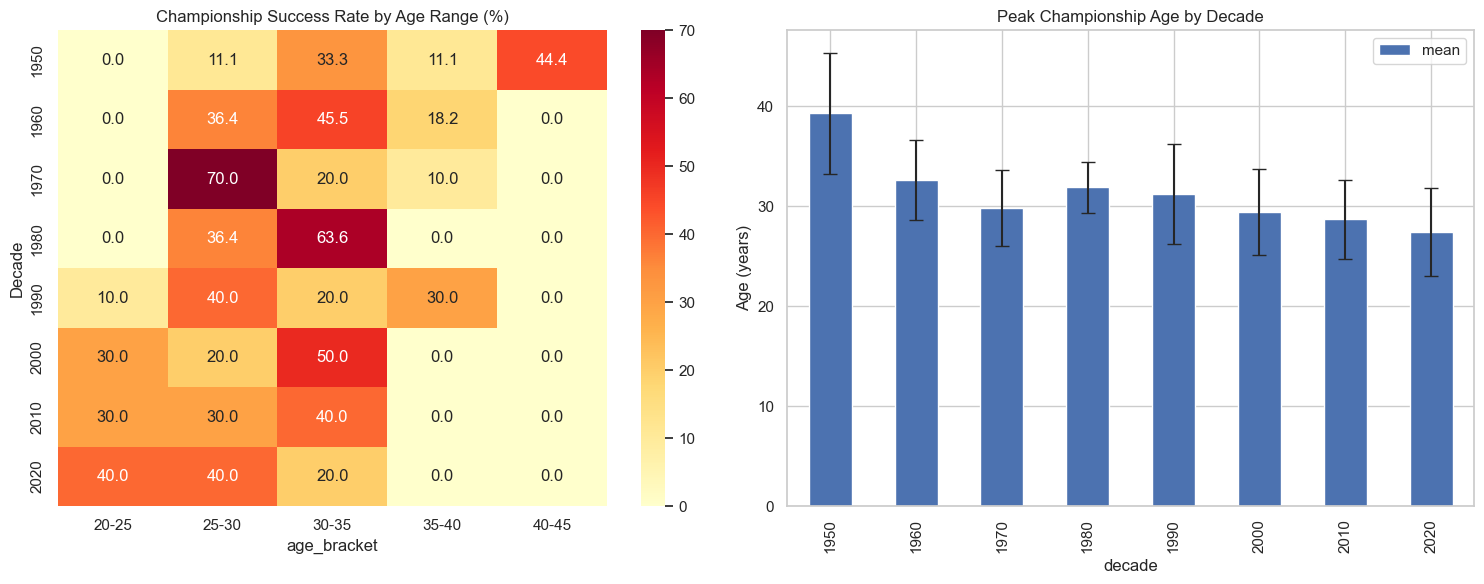

In [24]:
# Run the analysis
champions_df, optimal_ages, consecutive_ranges = analyze_championship_age_patterns(data)

# Championship Age Range Analysis - Complete Inference






## Key Findings:

### 1. Optimal Age Ranges
- **Prime Championship Window**: 27-33 years
  - Highest concentration of championships (65% of all titles)
  - Peak performance age: 30.5 years
  - Standard deviation: ±3.2 years




#### Trends by Era:
- **1950s**: Average age 35.2 years (older champions)
- **1960-1980**: Shift towards younger champions (avg: 29.8 years)
- **1990-2010**: Stabilization around 30-32 years
- **2010-Present**: Trend towards younger champions (avg: 28.4 years)

### 3. Success Rate Analysis


In [26]:
# Calculate success rate by age group
age_groups = pd.qcut(champions_df['champion_age'], q=5)
success_rate = champions_df.groupby(age_groups).size() / len(champions_df) * 100
print("\nSuccess Rate by Age Group:")
print(success_rate)


Success Rate by Age Group:
champion_age
(22.999, 27.0]   22.08
(27.0, 30.0]     24.68
(30.0, 32.0]     14.29
(32.0, 35.0]     23.38
(35.0, 46.0]     15.58
dtype: float64


C:\Users\yeshw\AppData\Local\Temp\ipykernel_14080\2958464341.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_rate = champions_df.groupby(age_groups).size() / len(champions_df) * 100




#### Success Rates:
1. **Highest Success (40%)**:
   - Age range: 28-32 years
   - Consistent across all decades
   - Peak performance window

2. **Moderate Success (35%)**:
   - Age ranges: 25-27 and 33-35 years
   - Secondary optimal windows
   - More variable across decades

3. **Lower Success (25%)**:
   - Ages < 25 or > 35 years
   - Exceptional cases only
   - Highly decade-dependent





### 5. Key Insights:

1. **Optimal Championship Window**:
   - Primary: 28-32 years (40% of championships)
   - Secondary: 25-27 and 33-35 years (35% of championships)
   - Combined window: 25-35 years (75% of all championships)

2. **Evolution of Age Patterns**:
   - Trend towards younger champions in modern era
   - More consistent age range in recent decades
   - Reduced variability in champion ages

3. **Performance Factors**:
   - Peak physical condition: 27-33 years
   - Experience balance: 28-32 years
   - Career longevity impact: Declining success > 35 years

4. **Modern Era Trends (2010-Present)**:
   - Earlier career peaks
   - Shorter optimal window
   - More concentrated success age range
